In [2]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

In [3]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .85
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,2.5


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

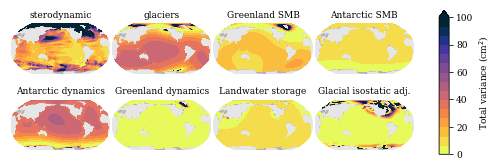

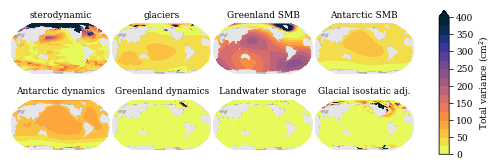

In [6]:
vmaxx = [100,400]
ncols = [15,16]

for s,scen in enumerate(['rcp45','rcp85']):
    with xr.open_dataset(f'../data/totvar_comp_{scen}.nc') as ds:
        stdn = ds['stdn'].values
        glac = ds['glac'].values
        gsmb = ds['gsmb'].values
        asmb = ds['asmb'].values
        adyn = ds['adyn'].values
        gdyn = ds['gdyn'].values
        lws  = ds['lws'].values
        gia  = ds['gia'].values
        lon  = ds['lon'].values
        lat  = ds['lat'].values
    
    vmax = vmaxx[s]
    cmap = plt.get_cmap('cmo.thermal_r',ncols[s])
    
    fig = plt.figure()
    
    ax = fig.add_subplot(2,4,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,stdn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('sterodynamic')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,glac,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('glaciers')
    makeglobal(ax)    
    
    ax = fig.add_subplot(2,4,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gsmb,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Greenland SMB')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,4,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,asmb,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Antarctic SMB')
    makeglobal(ax)

    ax = fig.add_subplot(2,4,5,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,adyn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Antarctic dynamics')
    makeglobal(ax)

    ax = fig.add_subplot(2,4,6,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gdyn,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Greenland dynamics')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,7,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,lws,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Landwater storage')
    makeglobal(ax)    
    
    ax = fig.add_subplot(2,4,8,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gia,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Glacial isostatic adj.')
    makeglobal(ax)
    
    cax = fig.add_axes([.9,.1,.02,.8])
    cb = plt.colorbar(im,cax=cax,extend='max')
    cb.set_label('Total variance (cm$^2$)')
    
    figname = f'draftplot_totvar_components_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()